<a href="https://colab.research.google.com/github/ziishanahmad/ai-image-color-detector-python-tool/blob/main/ai_image_color_detector_python_tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries
!pip install opencv-python-headless matplotlib


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from google.colab import files


Saving upwork-thumb.png to upwork-thumb.png


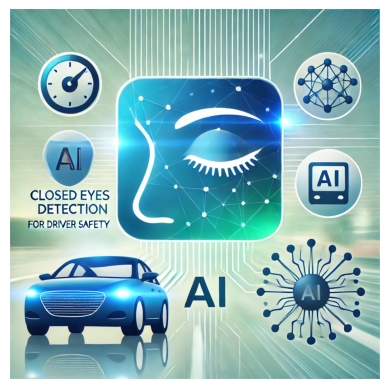

In [ ]:
# Function to upload and read the image
def upload_and_read_image():
    uploaded = files.upload()
    for filename in uploaded.keys():
        img = cv2.imread(filename)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
        return img

# Upload the image
image = upload_and_read_image()

# Display the uploaded image
plt.imshow(image)
plt.axis('off')
plt.show()


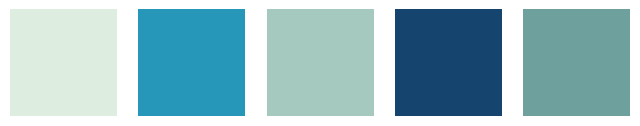

In [ ]:
def detect_colors(image, k=5):
    # Reshape the image to a 2D array of pixels
    pixels = image.reshape(-1, 3)

    # Perform K-means clustering to find the top k colors
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pixels)
    colors = kmeans.cluster_centers_

    return colors

# Detect colors
detected_colors = detect_colors(image)

# Display detected colors
def display_colors(colors):
    plt.figure(figsize=(8, 2))
    for i, color in enumerate(colors):
        plt.subplot(1, len(colors), i+1)
        plt.imshow([[color / 255]])
        plt.axis('off')
    plt.show()

display_colors(detected_colors)


In [ ]:
def get_color_codes(colors):
    color_codes = []
    for color in colors:
        # Convert RGB to HEX
        hex_code = '#{:02x}{:02x}{:02x}'.format(int(color[0]), int(color[1]), int(color[2]))
        color_codes.append(hex_code)
    return color_codes

color_codes = get_color_codes(detected_colors)
print("Detected Color Codes:", color_codes)


Detected Color Codes: ['#ddede0', '#2697b9', '#a5c9be', '#15446e', '#6ea19d']


<ipython-input-6-510864a342c6>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(colors), i+1)


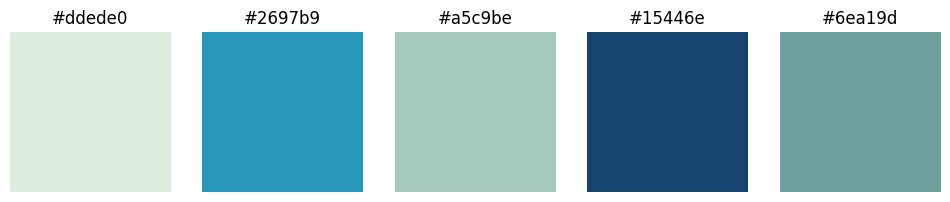

In [ ]:
def visualize_colors(image, colors):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    for i, color in enumerate(colors):
        plt.subplot(1, len(colors), i+1)
        plt.imshow([[color / 255]])
        plt.axis('off')
        plt.title(color_codes[i])
    plt.show()

visualize_colors(image, detected_colors)
